# **PART 1**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import datetime
import re
from sklearn import preprocessing
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
# Q1 import the superstore_m.csv dataset as a pandas dataframe. 
# Look over the data, the columns and their associated data types. 
# Create a copy of the data set here for later analysis, make sure you use .copy()

# !ls -la
df = pd.read_csv('./Superstore_m.csv') #reads the file uploaded
new_df = df.copy()  
df = df[df['Sales'] != ' 16GB' ]
# new_df

In [ ]:
# Q2 Drop all address related columns (Country, City, State, Postal, Code, Region) abd drop Row ID.
# You can hardcode this part. 

df = df.drop(columns=['Country','City','State','Postal Code','Region','Row ID'])
df

In [ ]:
# Q3 Strip the first three characters from the order ID column.
# df['Order ID'].unique()
df['Order ID'] = df['Order ID'].apply(lambda x: ''+ x[3:])
df

In [ ]:
# Q4 Round the profit and sales columns to two floating points.
# df.dtypes
df['Sales'] = df['Sales'].astype(float)
df.round({'Sales': 2, 'Profit': 2})
# df.dtypes

In [ ]:
# Q5 Format the Product-ID column such that the middle two letters are removed with only one – remaining,
# ex: OFF-BI-10003910
# to  OFF-10003910

splittedProductId = df['Product ID'].str.split('-',expand=True)
df['Product ID'] = splittedProductId[0]+ '-' + splittedProductId[2]
df

In [7]:
# Q6 read the date columns as in timestamp, convert them to YYYY/MM/DD hours:minutes:seconds format,
# where you set hours minutes and seconds to random values appropriate to their range.

from pandas._libs.lib import astype_intsafe
randomHours = np.random.random() * 24
time_change = datetime.timedelta(hours = randomHours)
df['Order Date'] = pd.to_datetime(df['Order Date']) # use format = '%y%m%d' for date format
df['Order Date'] = df['Order Date'].apply(lambda x : x + time_change)
df['Order Date'] = df['Order Date'].apply(lambda x : x.strftime('%Y/%m/%d %H:%M:%S'))
df['Ship Date'] = pd.to_datetime(df['Ship Date']) # use format = '%y%m%d' for date format
df['Ship Date'] = df['Ship Date'].apply(lambda x : x + time_change)
df['Ship Date'] = df['Ship Date'].apply(lambda x : x.strftime('%Y/%m/%d %H:%M:%S'))

# df.loc[(df['Order Date'].dt.date.astype(str) >= '2021-07-01') & (df['Order Date'].dt.date.astype(str) <= '2021-08-01')] #look between the given dates dates
# df.loc[~((df['date'].dt.date.astype(str) >= '2021-07-01') & (df['date'].dt.date.astype(str) <= '2021-08-01'))] ~ is the not sign or ! sign for pandas,, if we want to flip the above equation
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 21
0,2016-152156,2016/11/08 02:57:11,2016/11/11 02:57:11,Second Class,CG-12520,Claire Gute,Consumer,FUR-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,NaN
1,2016-152156,2016/11/08 02:57:11,2016/11/11 02:57:11,Second Class,CG-12520,Claire Gute,Consumer,FUR-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,NaN
2,2016-138688,2016/06/12 02:57:11,2016/06/16 02:57:11,Second Class,DV-13045,Darrin Van Huff,Corporate,OFF-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,NaN
3,2015-108966,2015/10/11 02:57:11,2015/10/18 02:57:11,Standard Class,SO-20335,Sean O'Donnell,Consumer,FUR-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,NaN
4,2015-108966,2015/10/11 02:57:11,2015/10/18 02:57:11,Standard Class,SO-20335,Sean O'Donnell,Consumer,OFF-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-110422,2014/01/21 02:57:11,2014/01/23 02:57:11,Second Class,TB-21400,Tom Boeckenhauer,Consumer,FUR-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,NaN
9990,2017-121258,2017/02/26 02:57:11,2017/03/03 02:57:11,Standard Class,DB-13060,Dave Brooks,Consumer,FUR-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,NaN
9991,2017-121258,2017/02/26 02:57:11,2017/03/03 02:57:11,Standard Class,DB-13060,Dave Brooks,Consumer,TEC-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932,NaN
9992,2017-121258,2017/02/26 02:57:11,2017/03/03 02:57:11,Standard Class,DB-13060,Dave Brooks,Consumer,OFF-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0,0.00,13.3200,NaN


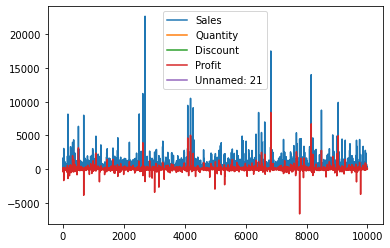

In [ ]:
# Q7 Plot the number (count) of unique transactions by Consumer Segment.
xAxis = df.groupby('Segment')
df.plot()

# **PART 2**